### Analysis_1
This analysis is to get familiar with the dataset and also to get some interesting facts about movies and ratings <br>
Use ratings and movies table to:
1. Count the number of movies produced each year and the trend
2. Count the number of movies with ratings>3 each year and the trend
3. Count the number of movies rated =5 each year and the trend

First, know my table structure and data

In [1]:
import os
import pandas as pd
from pandas import DataFrame as df
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
rootdir = os.path.expanduser('~')+'/final/data/ml-20m-dataset'

In [3]:
ratings = pd.read_csv(rootdir+'/ratings.csv')
movies = pd.read_csv(rootdir+'/movies.csv')

In [4]:
ratings.head(5)

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [5]:
movies.head(5)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
print(ratings.shape)
print(movies.shape)

(20000263, 4)
(27278, 3)


#### Count the number of movies produced each year and the trend <br>
1. Get the produce year of each movie (ignore the record if no year mentioned)
2. Add one more year column
3. group by year and count

filter non-year elements

In [7]:
year_filter = movies['title'].apply(lambda x: True if x[-5:-1].isdigit() else False)

In [8]:
movies['year'] = movies['title'].apply(lambda x: x[-5:-1])

In [9]:
movies = movies[year_filter]

In [10]:
df_q1 = movies[['year','movieId']].groupby('year').count().reset_index()
df_q1.head(3)

,year,movieId
0,1891,1
1,1893,1
2,1894,2


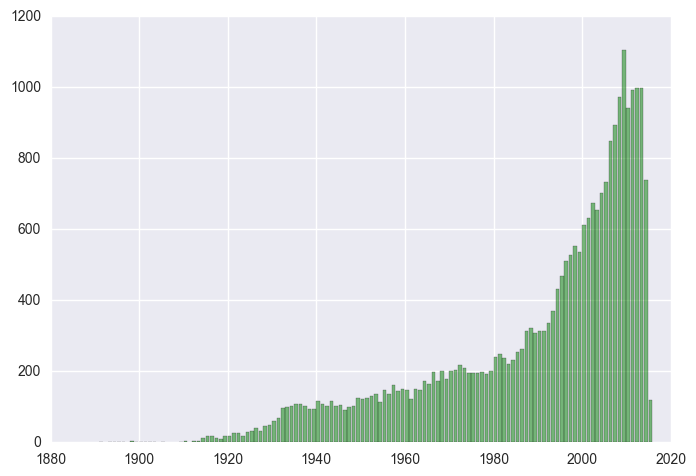

In [11]:
x1 = df_q1['year']
data1 = df_q1['movieId']
plt.bar(x1, data1, color ='g',alpha=0.5)
plt.show()

The rest two is to analysis user's rating' behavior change <br>
#### Count the number of movies with average ratings>3 every year and the trend
1. calculate average movie rating in ratings 
2. only keep the ones with rating>3 and inner join with movies_wt_year
3. group by year

In [12]:
rating_mean = ratings[['rating','movieId']].groupby('movieId').mean().reset_index()

In [13]:
rating_filter = rating_mean['rating'].apply(lambda x: x>3)

In [14]:
rating_mean[rating_filter].head(3)

,movieId,rating
0,1,3.921240
1,2,3.211977
2,3,3.151040


In [15]:
m_rover3_merged = movies.merge(rating_mean[rating_filter], on='movieId', how='inner')

In [16]:
m_rover3_merged.head(5)

,movieId,title,genres,year,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,3.921240
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995,3.211977
2,3,Grumpier Old Men (1995),Comedy|Romance,1995,3.151040
3,5,Father of the Bride Part II (1995),Comedy,1995,3.064592
4,6,Heat (1995),Action|Crime|Thriller,1995,3.834930


In [17]:
df_q2 = m_rover3_merged[['movieId','year']].groupby('year').count().reset_index()
df_q2.head(3)

,year,movieId
0,1893,1
1,1894,1
2,1895,1


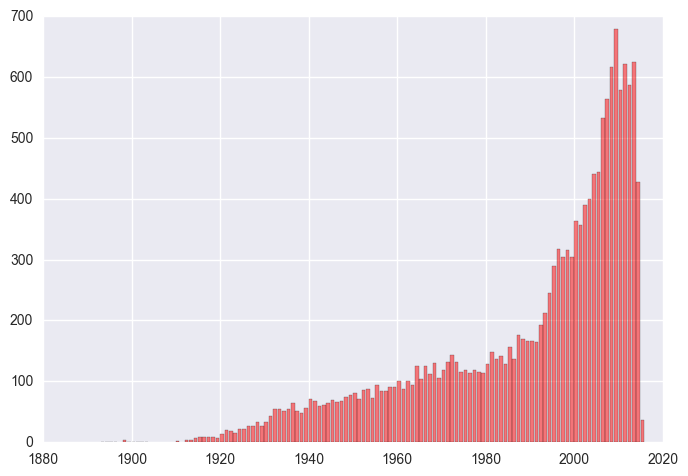

In [18]:
x2 = df_q2['year']
data2 = df_q2['movieId']
plt.bar(x2, data2, color ='r',alpha=0.5)
plt.show()

#### Count the number of movies rated =5 each year and the trend

In [19]:
rating_filter_2 = rating_mean['rating'].apply(lambda x: round(x)==5)

In [20]:
rating_mean[rating_filter_2].head(3)

,movieId,rating
3139,3226,4.666667
9005,26718,5.000000
9557,27914,5.000000


In [21]:
m_requal5_merged = movies.merge(rating_mean[rating_filter_2], on='movieId', how='inner')

In [22]:
m_requal5_merged.head(5)

,movieId,title,genres,year,rating
0,3226,Hellhounds on My Trail (1999),Documentary,1999,4.666667
1,26718,Life On A String (Bian chang Bian Zou) (1991),Adventure|Drama|Fantasy|Musical,1991,5.000000
2,27914,"Hijacking Catastrophe: 9/11, Fear & the Sellin...",Documentary,2004,5.000000
3,32230,"Snow Queen, The (Lumikuningatar) (1986)",Children|Fantasy,1986,5.000000
4,40404,Al otro lado (2004),Drama,2004,5.000000


In [23]:
df_q3 = m_requal5_merged[['movieId','year']].groupby('year').count().reset_index()
df_q3.head(3)

,year,movieId
0,1898,2
1,1901,1
2,1928,1


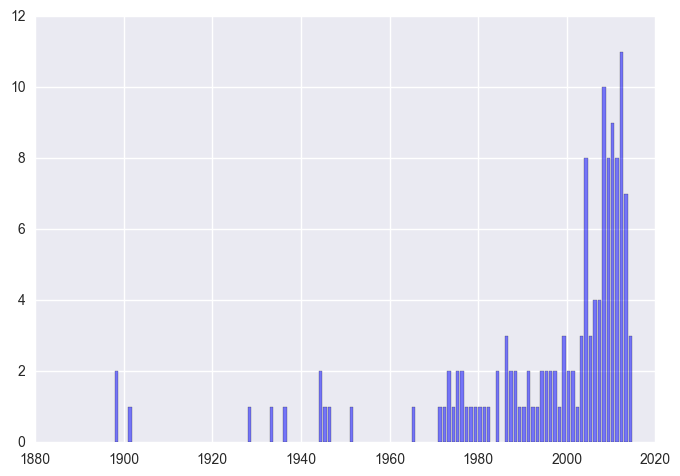

In [24]:
x3 = df_q3['year']
data3 = df_q3['movieId']
plt.bar(x3, data3, color ='b',alpha=0.5)
plt.show()

Below is a simple plot graph showing the difference among these three results

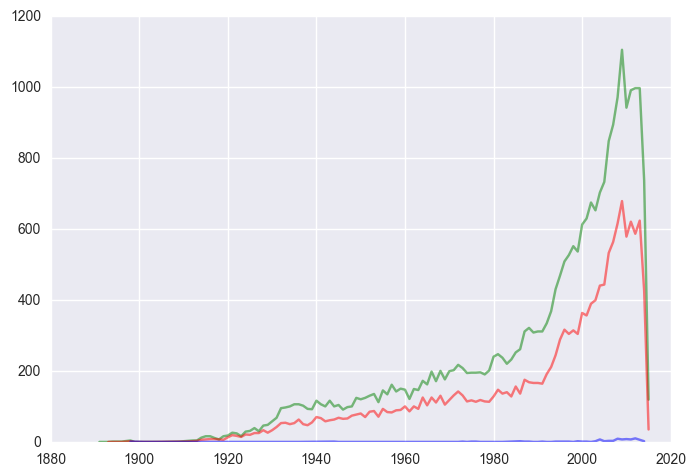

In [25]:
x1 = df_q1['year']
data1 = df_q1['movieId']
plt.plot(x1, data1, color ='g',alpha=0.5)

x2 = df_q2['year']
data2 = df_q2['movieId']
plt.plot(x2, data2, color ='r',alpha=0.5)

x3 = df_q3['year']
data3 = df_q3['movieId']
plt.plot(x3, data3, color ='b',alpha=0.5)

plt.show()

From the comparision graph we can tell that the amount of movies that has average rating is always around half of the movie produced in that year. But movies with average rating > 4.5 is always rare.